In [63]:
import sys
sys.path.append("../2_train_models")

# TODO: update this to use eval on the test set at the last second

from utils import get_proj_dir
from file_configs import ValFilesConfig
from data_loading import extract_peaks
from performance_metrics import compute_performance_metrics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch

In [7]:
cell_types = ["K562", "A673", "CACO2", "CALU3", "HUVEC", "MCF10A"]

timestamps = {"K562" : "2022-10-05_03-39-32",
              "A673" : "2022-11-01_05-16-07",
              "CACO2" : "2022-11-01_19-09-32",
              "CALU3" : "2022-11-01_19-09-51",
              "HUVEC" : "2022-11-01_05-16-51",
              "MCF10A" : "2022-11-01_05-04-08"}

model_type = "strand_merged_umap"
data_type = "procap"

In [9]:
def load_true_profs_all_cells(cell_types, timestamps, model_type, data_type):
    true_profs = dict()
    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        _, true_profiles = extract_peaks(config.genome_path,
                                         config.chrom_sizes,
                                         config.plus_bw_path,
                                         config.minus_bw_path,
                                         config.val_peak_path,
                                         in_window=config.in_window,
                                         out_window=config.out_window,
                                         max_jitter=0, verbose=True)
        true_profs[cell_type] = true_profiles
    return true_profs
        
true_profs = load_true_profs_all_cells(cell_types, timestamps, model_type, data_type)

true_counts = {cell : profs.sum(axis=-1) for cell, profs in true_profs.items()}
true_counts_strand_merged = {cell : counts.sum(axis=-1) for cell, counts in true_counts.items()}

Timestamp: 2022-10-05_03-39-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.70it/s]
Loading Peaks: 3834it [00:05, 666.57it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/K562/strand_merged_umap/2022-10-05_03-39-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3834
Mask loaded? False


Timestamp: 2022-11-01_05-16-07
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  3.00it/s]
Loading Peaks: 5596it [00:08, 698.06it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/A673/strand_merged_umap/2022-11-01_05-16-07_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5596
Mask loaded? False


Timestamp: 2022-11-01_19-09-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.03it/s]
Loading Peaks: 5768it [00:08, 718.56it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CACO2/strand_merged_umap/2022-11-01_19-09-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5768
Mask loaded? False


Timestamp: 2022-11-01_19-09-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.02it/s]
Loading Peaks: 5553it [00:08, 670.83it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CALU3/strand_merged_umap/2022-11-01_19-09-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5553
Mask loaded? False


Timestamp: 2022-11-01_05-16-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.02it/s]
Loading Peaks: 3357it [00:05, 640.20it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/HUVEC/strand_merged_umap/2022-11-01_05-16-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3357
Mask loaded? False


Timestamp: 2022-11-01_05-04-08
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.01it/s]
Loading Peaks: 6258it [00:08, 697.88it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/MCF10A/strand_merged_umap/2022-11-01_05-04-08_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 6258
Mask loaded? False


In [13]:
def get_pseudorep_filepaths(val_config, pseudorep = 1, pos_or_neg = "pos"):
    data_dir = os.path.dirname(val_config.train_val_peak_path)
    return os.path.join(data_dir, "pseudorep" + str(pseudorep) + "." + pos_or_neg + ".bigWig")

def load_pseudorep_true_profs(cell_types, timestamps, model_type, data_type):
    pr1_profs = dict()
    pr2_profs = dict()

    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        _, pr1_profiles = extract_peaks(config.genome_path,
                                        config.chrom_sizes,
                                        get_pseudorep_filepaths(config, 1, "pos"),
                                        get_pseudorep_filepaths(config, 1, "neg"),
                                        config.val_peak_path,
                                        in_window=config.in_window,
                                        out_window=config.out_window,
                                        max_jitter=0, verbose=True)
        
        pr1_profs[cell_type] = pr1_profiles
        
        _, pr2_profiles = extract_peaks(config.genome_path,
                                        config.chrom_sizes,
                                        get_pseudorep_filepaths(config, 2, "pos"),
                                        get_pseudorep_filepaths(config, 2, "neg"),
                                        config.val_peak_path,
                                        in_window=config.in_window,
                                        out_window=config.out_window,
                                        max_jitter=0, verbose=True)
        
        pr2_profs[cell_type] = pr2_profiles
        
    return pr1_profs, pr2_profs

pr1_profs, pr2_profs = load_pseudorep_true_profs(cell_types, timestamps, model_type, data_type)

Timestamp: 2022-10-05_03-39-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.91it/s]
Loading Peaks: 3834it [00:05, 673.80it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/K562/strand_merged_umap/2022-10-05_03-39-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3834
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.02it/s]
Loading Peaks: 3834it [00:05, 733.58it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/K562/strand_merged_umap/2022-10-05_03-39-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3834
Mask loaded? False


Timestamp: 2022-11-01_05-16-07
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.99it/s]
Loading Peaks: 5596it [00:08, 685.83it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/A673/strand_merged_umap/2022-11-01_05-16-07_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5596
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.99it/s]
Loading Peaks: 5596it [00:08, 663.23it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/A673/strand_merged_umap/2022-11-01_05-16-07_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5596
Mask loaded? False


Timestamp: 2022-11-01_19-09-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.00it/s]
Loading Peaks: 5768it [00:08, 689.38it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CACO2/strand_merged_umap/2022-11-01_19-09-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5768
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.99it/s]
Loading Peaks: 5768it [00:08, 707.30it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CACO2/strand_merged_umap/2022-11-01_19-09-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5768
Mask loaded? False
Timestamp: 2022-11-01_19-09-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.99it/s]
Loading Peaks: 5553it [00:08, 690.08it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CALU3/strand_merged_umap/2022-11-01_19-09-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5553
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.01it/s]
Loading Peaks: 5553it [00:08, 669.72it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CALU3/strand_merged_umap/2022-11-01_19-09-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5553
Mask loaded? False
Timestamp: 2022-11-01_05-16-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  3.00it/s]
Loading Peaks: 3357it [00:05, 639.90it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/HUVEC/strand_merged_umap/2022-11-01_05-16-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3357
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.98it/s]
Loading Peaks: 3357it [00:05, 591.05it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/HUVEC/strand_merged_umap/2022-11-01_05-16-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3357
Mask loaded? False


Timestamp: 2022-11-01_05-04-08
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.98it/s]
Loading Peaks: 6258it [00:09, 684.63it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/MCF10A/strand_merged_umap/2022-11-01_05-04-08_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 6258
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.98it/s]
Loading Peaks: 6258it [00:09, 643.36it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/MCF10A/strand_merged_umap/2022-11-01_05-04-08_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 6258
Mask loaded? False


In [14]:
def load_pred_profiles_all_cells(cell_types, timestamps, model_type, data_type):
    log_pred_profs = dict()
    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        pred_profiles_path = config.pred_profiles_val_path
        log_pred_profs[cell_type] = np.load(pred_profiles_path)
    return log_pred_profs

def load_pred_logcounts_all_cells(cell_types, timestamps, model_type, data_type):
    pred_logcounts = dict()
    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        pred_logcounts_path = config.pred_logcounts_val_path
        pred_logcounts[cell_type] = np.load(pred_logcounts_path).squeeze()
    return pred_logcounts

log_pred_profs = load_pred_profiles_all_cells(cell_types, timestamps, model_type, data_type)
pred_logcounts = load_pred_logcounts_all_cells(cell_types, timestamps, model_type, data_type)

Timestamp: 2022-10-05_03-39-32
Timestamp: 2022-11-01_05-16-07
Timestamp: 2022-11-01_19-09-32
Timestamp: 2022-11-01_19-09-51
Timestamp: 2022-11-01_05-16-51
Timestamp: 2022-11-01_05-04-08
Timestamp: 2022-10-05_03-39-32
Timestamp: 2022-11-01_05-16-07
Timestamp: 2022-11-01_19-09-32
Timestamp: 2022-11-01_19-09-51
Timestamp: 2022-11-01_05-16-51
Timestamp: 2022-11-01_05-04-08


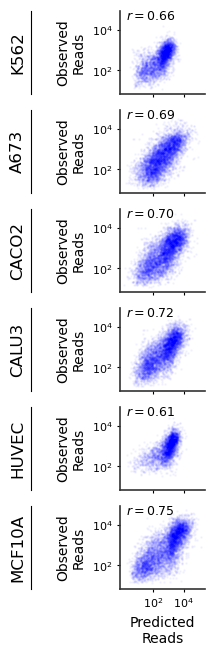

In [15]:
def plot_pred_vs_true_counts_all_cells(all_pred_logcounts,
                                       all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 8,
                   "ytick.labelsize": 8}
    plt.rcParams.update(plot_params)
    
    fig, axes = plt.subplots(len(cell_types), 1,
                             figsize=(1.1, 7.5),
                             sharex=True, sharey=True)
    
    max_max_lim = 0
    min_min_lim = np.inf
    for ax, cell_type in zip(axes, cell_types):
        pred_logcounts = all_pred_logcounts[cell_type]
        true_counts = all_true_counts[cell_type]
    
        pred_logcounts = pred_logcounts.squeeze().flatten()
        true_counts = true_counts.squeeze().flatten()

        assert pred_logcounts.shape == true_counts.shape

        pearson_r = np.corrcoef(pred_logcounts,
                                np.log1p(true_counts))[0,1]

        ax.scatter(np.exp(pred_logcounts), true_counts,
                    alpha = 0.03, s = 1, color="blue")

        ax.semilogy()
        ax.semilogx()

        max_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
        min_lim = min(ax.get_xlim()[0], ax.get_ylim()[0])
        max_max_lim = max(max_max_lim, max_lim)
        min_min_lim = min(min_min_lim, min_lim)

        ax.set_ylabel("Observed\nReads", fontsize=10)
        
        if cell_type == cell_types[-1]:
            ax.set_xlabel("Predicted\nReads", fontsize=10)

        if pearson_r is not None:
            ax.text(2, 30000,
                     r'$r = %0.2f$' % pearson_r,
                     fontsize=9)

        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        
        ax.tick_params("y", length=2)
        ax.tick_params("x", length=2)
        
        ax2 = ax.twinx()
        ax2.spines["left"].set_position(("axes", -1.05))
        ax2.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
        ax2.yaxis.set_label_position('left')
        ax2.yaxis.set_ticks_position('none')
        ax2.set_yticklabels([])
        ax2.set_ylabel(cell_type, fontsize = 12)
        
    ax.set_xticks([10**2, 10**4])
        
    plt.show()
    

plot_pred_vs_true_counts_all_cells(pred_logcounts,
                                   true_counts_strand_merged,
                                   cell_types)

In [17]:
def get_replicate_val_metrics(all_rep1_profs, all_rep2_profs, cell_types):
    rep_val_metrics = dict()
    for cell_type in cell_types:
        rep1_profs = all_rep1_profs[cell_type]
        rep2_profs = all_rep2_profs[cell_type]
        
        # need to make one of the replicates look like model predictions
        # (normalize to sum to 1, then take the log)
        # (need to add pseudocount to avoid log of 0 error)
        log_rep2_profs = np.log((rep2_profs + 1e-2) / (rep2_profs + 1e-2).sum(axis=(-1,-2), keepdims=True))
        
        metrics = compute_performance_metrics(rep1_profs.swapaxes(1,2)[:, None, :, :],
                                              log_rep2_profs.swapaxes(1,2)[:, None, :, :],
                                              rep1_profs.sum(axis=-1)[:, None, :],
                                              np.log1p(rep2_profs.sum(axis=-1))[:, None, :],
                                              smooth_true_profs=False,
                                              smooth_pred_profs=False)
        rep_val_metrics[cell_type] = metrics
    return rep_val_metrics

rep_val_metrics = get_replicate_val_metrics(pr1_profs, pr2_profs, cell_types)

/mnt/lab_data2/kcochran/new_procap_models/src/figure_notebooks/../2_train_models/performance_metrics.py:52: RuntimeWarning: invalid value encountered in true_divide
  cross_ent = (-log_prob_pows_sum) / trials


In [18]:
def get_nonsmooth_val_metrics(all_true_profs, all_log_pred_profs,
                              all_true_counts, all_pred_logcounts, cell_types):
    val_metrics = dict()
    for cell_type in cell_types:
        true_profs = all_true_profs[cell_type]
        log_pred_profs = all_log_pred_profs[cell_type]
        true_counts = all_true_counts[cell_type]
        pred_logcounts = all_pred_logcounts[cell_type]
        
        metrics = compute_performance_metrics(true_profs.swapaxes(1,2)[:, None, :, :],
                                              log_pred_profs.swapaxes(1,2)[:, None, :, :],
                                              true_counts[:, None, :],
                                              np.concatenate((pred_logcounts[:, None, None],
                                                              pred_logcounts[:, None, None]), axis=-1),
                                              smooth_true_profs=False,
                                              smooth_pred_profs=False)
        val_metrics[cell_type] = metrics
    return val_metrics

val_metrics = get_nonsmooth_val_metrics(true_profs, log_pred_profs,
                                        true_counts, pred_logcounts, cell_types)

In [19]:
def get_random_baseline_val_metrics(all_true_profs, all_true_counts, cell_types):
    val_metrics = dict()
    for cell_type in cell_types:
        true_profs = all_true_profs[cell_type]
        true_counts = all_true_counts[cell_type]
        
        rand_pred_profs = np.ones_like(true_profs)
        # assuming strand-merged
        assert "strand_merged" in model_type
        rand_log_pred_profs = np.log(rand_pred_profs / np.sum(rand_pred_profs, axis=(-1,-2), keepdims=True))
        rand_pred_logcounts = np.ones_like(true_counts)
        
        metrics = compute_performance_metrics(true_profs.swapaxes(1,2)[:, None, :, :],
                                              rand_log_pred_profs.swapaxes(1,2)[:, None, :, :],
                                              true_counts[:, None, :],
                                              rand_pred_logcounts[:, None, :],
                                              smooth_true_profs=False,
                                              smooth_pred_profs=False)
        val_metrics[cell_type] = metrics
    return val_metrics

rand_val_metrics = get_random_baseline_val_metrics(true_profs, true_counts, cell_types)

In [21]:
# colormap code from https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72
# (credits to Kerry Halupka)

from matplotlib import colors as mplcolors

def get_continuous_cmap(hex_list, float_list=None):
    def hex_to_rgb(value):
        '''
        Converts hex to rgb colours
        value: string of 6 characters representing a hex colour.
        Returns: list length 3 of RGB values'''
        value = value.strip("#") # removes hash symbol if present
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_dec(value):
        '''
        Converts rgb to decimal colours (i.e. divides each value by 256)
        value: list (length 3) of RGB values
        Returns: list (length 3) of decimal values'''
        return [v/256 for v in value]
    
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        cdict[col] = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]

    return mplcolors.LinearSegmentedColormap('cmp', segmentdata=cdict, N=256)

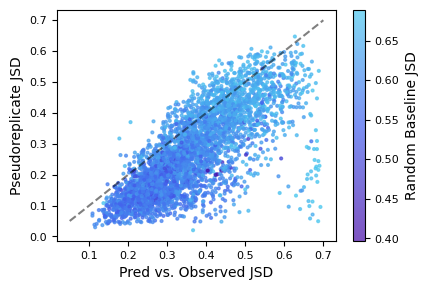

In [22]:
plt.figure(figsize=(4.5,3))
plt.scatter(val_metrics["K562"]["jsd"], rep_val_metrics["K562"]["jsd"], alpha=0.7, s=4,
            c = rand_val_metrics["K562"]["jsd"],
            cmap = get_continuous_cmap(["#480CA8", "#4361EE", "#4CC9F0"]))

plt.plot([0.05,0.7],[0.05,0.7], color="k", alpha=0.5, linestyle="dashed")
plt.xlabel("Pred vs. Observed JSD")
plt.ylabel("Pseudoreplicate JSD")
plt.colorbar(label="Random Baseline JSD")
plt.show()

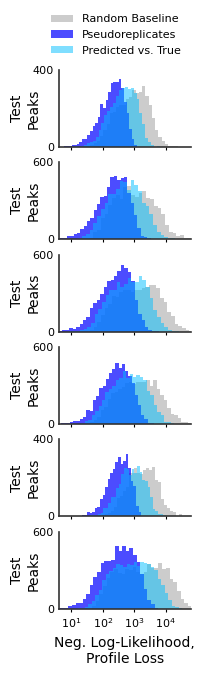

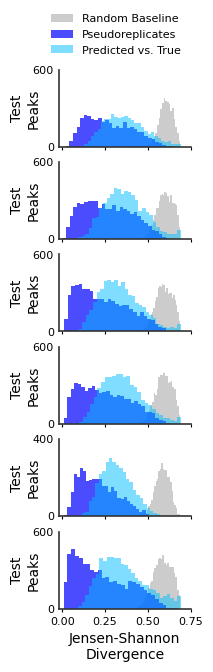

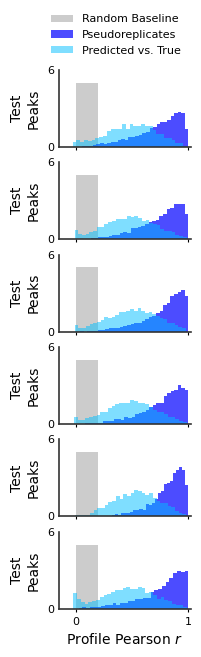

In [24]:
def plot_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics,
                                    metric = "nll", cell_types = cell_types):
    
    metric_names = {"nll" : "Neg. Log-Likelihood,\nProfile Loss",
                    "jsd" : "Jensen-Shannon\nDivergence",
                    "profile_pearson" : r'Profile Pearson $r$'}

    fig, axes = plt.subplots(len(cell_types), 1, figsize=(1.7,7), sharex = True)
    
    for ax, cell_type in zip(axes, cell_types):
        pred_vs_obs = val_metrics[cell_type][metric]
        rep_baseline = rep_val_metrics[cell_type][metric]
        rand_baseline = rand_val_metrics[cell_type][metric]
    
        if metric in ["nll"]:
            pred_vs_obs = np.log10(pred_vs_obs + 1e-5)
            rep_baseline = np.log10(rep_baseline + 1e-5)
            rand_baseline = np.log10(rand_baseline + 1e-5)
          
        if metric in ["profile_pearson"]:
            ax.hist(rand_baseline, bins = np.arange(-1,1,0.2), color="grey", alpha=0.4, label="Random Baseline",
                    density=metric in ["profile_pearson"])
        else:
            ax.hist(rand_baseline, bins = 30, color="grey", alpha=0.4, label="Random Baseline")
        ax.hist(rep_baseline, bins = 30, color="blue", alpha=0.7, label="Pseudoreplicates",
               density=metric in ["profile_pearson"])
        ax.hist(pred_vs_obs, bins = 30, color="deepskyblue", alpha=0.5, label="Predicted vs. True",
               density=metric in ["profile_pearson"])
        
        if metric in ["nll"]:
            x_ticks = range(1, 5)
            ax.set_xticks(ticks=x_ticks,
                          labels=[r'$10^{' + str(i) + r'}$' for i in x_ticks],
                          fontsize=8)
        else:
            ax.set_xticks(ax.get_xticks(), fontsize=8)
        if metric in ["jsd"]:
            ax.set_xlim(-0.02, ax.get_xlim()[1])
        if metric in ["profile_pearson"]:
            ax.set_xlim(-0.15, 1.02)
        if metric in ["nll"]:
            ax.set_xlim(0.6, 4.8)
            
        if cell_type == cell_types[-1]:
            ax.set_xlabel(metric_names[metric], fontsize = 10)
        
        if cell_type == cell_types[0]:
            ax.legend(fontsize=8, frameon=False, bbox_to_anchor=(1,1.85))
        
        ax.set_yticks([ax.get_yticks()[0], ax.get_yticks()[-1]], fontsize=8)

        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        ax.yaxis.set_ticks_position('none')
        ax.tick_params("y", length=0)
        ax.tick_params("x", length=2)
        
        ax2 = ax.twinx()
        ax2.spines["left"].set_position(("axes", -0.1))
        ax2.spines["left"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
        ax2.yaxis.set_label_position('left')
        ax2.yaxis.set_ticks_position('none')
        ax2.set_yticklabels([])
        ax2.set_ylabel("Test\nPeaks", fontsize = 10)

    plt.show()

plot_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "nll")
plot_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "jsd")
plot_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "profile_pearson")

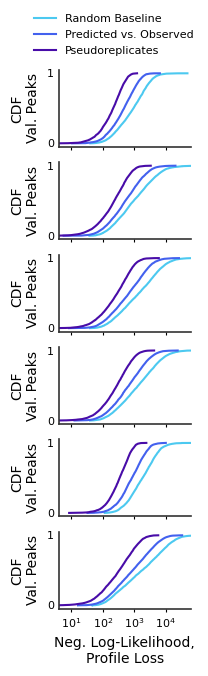

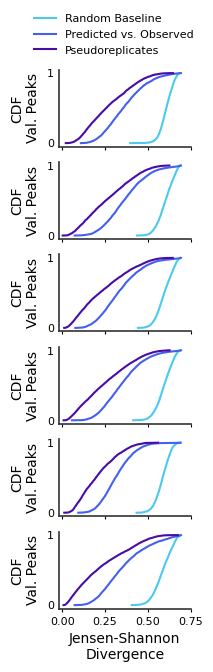

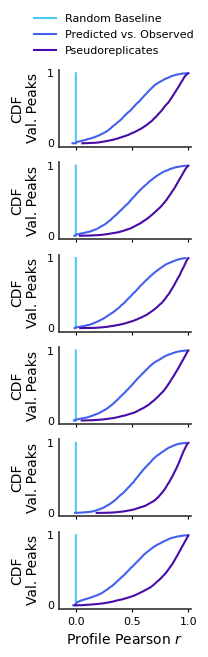

In [50]:
def plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics,
                                    metric = "nll", cell_types = cell_types):
    
    metric_names = {"nll" : "Neg. Log-Likelihood,\nProfile Loss",
                    "jsd" : "Jensen-Shannon\nDivergence",
                    "profile_pearson" : r'Profile Pearson $r$'}

    fig, axes = plt.subplots(len(cell_types), 1, figsize=(1.7,7), sharex = True)
    
    for ax, cell_type in zip(axes, cell_types):
        pred_vs_obs = val_metrics[cell_type][metric].squeeze()
        rep_baseline = rep_val_metrics[cell_type][metric].squeeze()
        rand_baseline = rand_val_metrics[cell_type][metric].squeeze()
    
        if metric in ["nll"]:
            pred_vs_obs = np.log10(pred_vs_obs + 1e-5)
            rep_baseline = np.log10(rep_baseline + 1e-5)
            rand_baseline = np.log10(rand_baseline + 1e-5)
          
        pred_vs_obs = np.sort(pred_vs_obs)
        rep_baseline = np.sort(rep_baseline)
        rand_baseline = np.sort(rand_baseline)
        cdf = np.array(range(len(pred_vs_obs)))/float(len(pred_vs_obs))

        ax.plot(rand_baseline, cdf, color="#4CC9F0", alpha=1, label="Random Baseline")
        ax.plot(pred_vs_obs, cdf, color="#4361EE", alpha=1, label="Predicted vs. Observed")
        ax.plot(rep_baseline, cdf, color="#480CA8", alpha=1, label="Pseudoreplicates")
        
        if metric in ["nll"]:
            x_ticks = range(1, 5)
            ax.set_xticks(ticks=x_ticks,
                          labels=[r'$10^{' + str(i) + r'}$' for i in x_ticks],
                          fontsize=8)
        else:
            ax.set_xticks(ax.get_xticks(), fontsize=8)
        if metric in ["jsd"]:
            ax.set_xlim(-0.02, ax.get_xlim()[1])
        if metric in ["profile_pearson"]:
            ax.set_xlim(-0.15, 1.02)
        if metric in ["nll"]:
            ax.set_xlim(0.6, 4.8)
            
        if cell_type == cell_types[-1]:
            ax.set_xlabel(metric_names[metric], fontsize = 10)
        
        if cell_type == cell_types[0]:
            ax.legend(fontsize=8, frameon=False, bbox_to_anchor=(1.1,1.85))
        
        ax.set_yticks([0, 1], fontsize=8)

        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        ax.yaxis.set_ticks_position('none')
        ax.tick_params("y", length=0)
        ax.tick_params("x", length=2)
        
        ax2 = ax.twinx()
        ax2.spines["left"].set_position(("axes", -0.1))
        ax2.spines["left"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
        ax2.yaxis.set_label_position('left')
        ax2.yaxis.set_ticks_position('none')
        ax2.set_yticklabels([])
        ax2.set_ylabel("CDF\nVal. Peaks", fontsize = 10)

    plt.show()

plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "nll")
plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "jsd")
plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "profile_pearson")

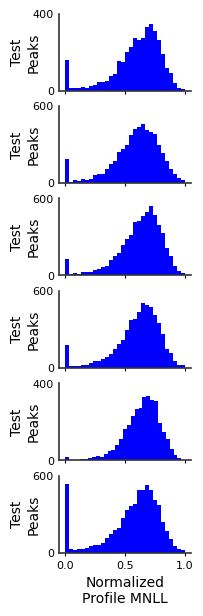

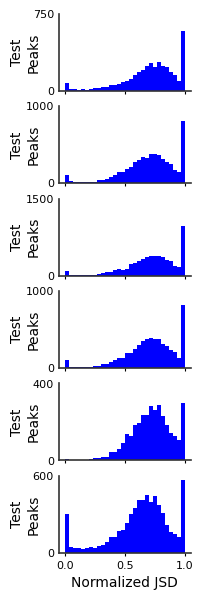

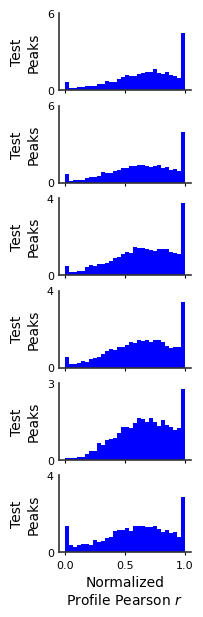

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def plot_norm_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics,
                                    metric = "nll", cell_types = cell_types):
    
    metric_names = {"nll" : "Normalized\nProfile MNLL",
                    "jsd" : "Normalized JSD",
                    "profile_pearson" : "Normalized\n" + r'Profile Pearson $r$'}

    fig, axes = plt.subplots(len(cell_types), 1, figsize=(1.7,7), sharex = True)
    
    for ax, cell_type in zip(axes, cell_types):
        pred_vs_obs = val_metrics[cell_type][metric]
        rep_baseline = rep_val_metrics[cell_type][metric]
        rand_baseline = rand_val_metrics[cell_type][metric]
    
        #if metric in ["nll"]:
        #    pred_vs_obs = np.log10(pred_vs_obs + 1e-5)
        #    rep_baseline = np.log10(rep_baseline + 1e-5)
        #    rand_baseline = np.log10(rand_baseline + 1e-5)
          
        norm_metric = (pred_vs_obs - rand_baseline) / (rep_baseline - rand_baseline)
        norm_metric = np.clip(norm_metric, 0, 1)
        ax.hist(norm_metric, bins = 30, color="blue", density=metric in ["profile_pearson"])

        ax.set_xticks(ax.get_xticks(), fontsize=8)
        ax.set_xlim(-0.05, 1.05)
        if cell_type == cell_types[-1]:
            ax.set_xlabel(metric_names[metric], fontsize = 10)
        
        ax.set_yticks([ax.get_yticks()[0], ax.get_yticks()[-1]], fontsize=8)

        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        ax.yaxis.set_ticks_position('none')
        ax.tick_params("y", length=0)
        ax.tick_params("x", length=2)
        
        ax2 = ax.twinx()
        ax2.spines["left"].set_position(("axes", -0.1))
        ax2.spines["left"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
        ax2.yaxis.set_label_position('left')
        ax2.yaxis.set_ticks_position('none')
        ax2.set_yticklabels([])
        ax2.set_ylabel("Test\nPeaks", fontsize = 10)

    plt.show()

plot_norm_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "nll")
plot_norm_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "jsd")
plot_norm_prof_performance_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "profile_pearson")

In [85]:
def get_norm_val_metrics_all_cells(val_metrics, rep_val_metrics, rand_val_metrics,
                                   metrics = ["nll", "jsd", "profile_pearson"],
                                   cell_types = cell_types):
    
    norm_val_metrics = defaultdict(lambda : dict())
    
    for cell_type in cell_types:
        for metric in metrics:
            pred_vs_obs = val_metrics[cell_type][metric]
            rep_baseline = rep_val_metrics[cell_type][metric]
            rand_baseline = rand_val_metrics[cell_type][metric]
          
            norm_metrics = (pred_vs_obs - rand_baseline) / (rep_baseline - rand_baseline)
            norm_metrics = np.clip(norm_metrics, 0, 1)
            norm_val_metrics[cell_type][metric] = norm_metrics

    return norm_val_metrics

norm_val_metrics = get_norm_val_metrics_all_cells(val_metrics, rep_val_metrics, rand_val_metrics)

In [86]:
norm_val_metrics["K562"]["nll"]

array([[0.73501456],
       [0.7927582 ],
       [0.78323377],
       ...,
       [0.        ],
       [0.67818282],
       [0.57178929]])

In [ ]:
def get_orientation_indexes(profiles):
    return np.max(profiles.sum(axis=-1), axis=-1) / np.sum(profiles, axis=(-1,-2))

K562


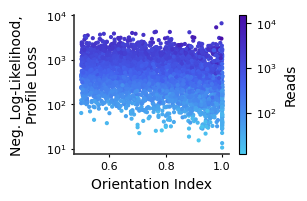

A673


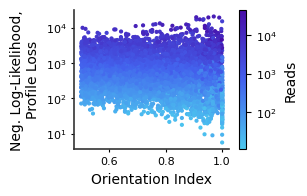

CACO2


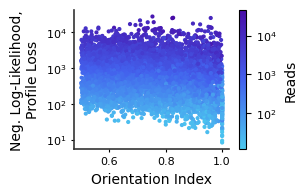

CALU3


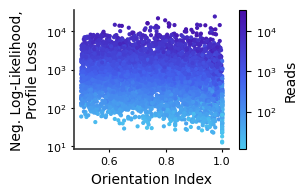

HUVEC


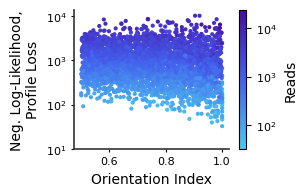

MCF10A


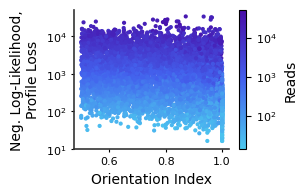

In [16]:
def metrics_by_orientation_index_and_counts(val_metrics, true_profs, true_counts, cell_types, metric = "nll"):
    metric_names = {"nll" : "Neg. Log-Likelihood,\nProfile Loss",
                    "jsd" : "Jensen-Shannon Divergence",
                    "profile_pearson" : "Profile Pearson Correlation"}

    for cell_type in cell_types:
        print(cell_type)
        data = val_metrics[cell_type][metric]
        
        if metric in ["nll"]:
            data = np.log10(data)
        
        plt.figure(figsize=(2.5, 1.8))

        cmap = get_continuous_cmap(["#4CC9F0", "#4361EE", "#480CA8"])
        plt.scatter(get_orientation_indexes(true_profs[cell_type]),
                    data,
                    c = np.log10(true_counts[cell_type].sum(axis=-1)),
                    s = 4, alpha=1, cmap=cmap)
        
        ax = plt.gca()
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        #ax.xaxis.set_ticks_position('none') 
        #ax.yaxis.set_ticks_position('none')
        ax.tick_params(length=2)
            
        if metric in ["nll"]:
            y_ticks = range(1, 5)
            plt.yticks(ticks=y_ticks, labels=[r'$10^' + str(i) + r'$' for i in y_ticks], fontsize=8)
        else:
            plt.yticks(fontsize=8)
        
        plt.ylabel(metric_names[metric], fontsize=10)
        
        plt.xticks(fontsize=8)
        plt.xlabel("Orientation Index", fontsize=10)
        
        cb = plt.colorbar(pad=0.05)
        cb.ax.tick_params(labelsize=8)
        cb.ax.set_yticks(range(2,5))
        cb.ax.set_yticklabels([r'$10^' + str(i) + r'$' for i in cb.ax.get_yticks()])
        cb.set_label(label="Reads", fontsize=10, labelpad=5)
        
        plt.show()
        
metrics_by_orientation_index_and_counts(val_metrics, true_profs, true_counts, cell_types, "nll")

In [179]:


os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-40f43250-998e-586a-ac37-d6520e92590f"

union_peaks_path = get_proj_dir() + "data/" + data_type + "/processed/union_val_peaks_across_cell_types.bed.gz"


def _predict(model, onehot_seqs, batch_size=64, logits = False):
    with torch.no_grad():
        starts = np.arange(0, onehot_seqs.shape[0], batch_size)
        ends = starts + batch_size

        y_profiles, y_counts = [], []
        for start, end in zip(starts, ends):
            X_batch = onehot_seqs[start:end].cuda()

            y_profiles_, y_counts_ = model(X_batch)
            if not logits:  # apply softmax
                y_profiles_ = model.log_softmax(y_profiles_)
            y_profiles.append(y_profiles_.cpu().detach().numpy())
            y_counts.append(y_counts_.cpu().detach().numpy())

        y_profiles = np.concatenate(y_profiles)
        y_counts = np.concatenate(y_counts)
        return y_profiles, y_counts

def predict_union_peaks_all_cells(cell_types, timestamps, model_type, data_type):
    pred_logcounts = dict()
    true_counts = dict()
    for cell_type in cell_types:
        print(cell_type)
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        model = torch.load(config.model_save_path).cuda()
        
        onehot_seqs, true_profs = extract_peaks(config.genome_path,
                                       config.chrom_sizes,
                                       config.plus_bw_path,
                                       config.minus_bw_path,
                                       union_peaks_path,
                                       in_window=config.in_window,
                                       out_window=config.out_window,
                                       max_jitter=0, verbose=True)

        _, pred_logcts = _predict(model, torch.tensor(onehot_seqs, dtype=torch.float))
        pred_logcounts[cell_type] = pred_logcts
        true_counts[cell_type] = true_profs.sum(axis=-1)
    return pred_logcounts, true_counts


union_pred_logcounts, union_true_counts = predict_union_peaks_all_cells(cell_types, timestamps,
                                                     model_type, data_type)

K562
Timestamp: 2022-10-05_03-39-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:35<00:00,  1.47s/it]
Loading Peaks: 11335it [00:16, 707.85it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
A673
Timestamp: 2022-11-01_05-16-07
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.93it/s]
Loading Peaks: 11335it [00:15, 731.80it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
CACO2
Timestamp: 2022-11-01_19-09-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.93it/s]
Loading Peaks: 11335it [00:15, 725.37it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
CALU3
Timestamp: 2022-11-01_19-09-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.96it/s]
Loading Peaks: 11335it [00:15, 728.49it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
HUVEC
Timestamp: 2022-11-01_05-16-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.94it/s]
Loading Peaks: 11335it [00:15, 711.16it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
MCF10A
Timestamp: 2022-11-01_05-04-08
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.96it/s]
Loading Peaks: 11335it [00:15, 722.65it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False


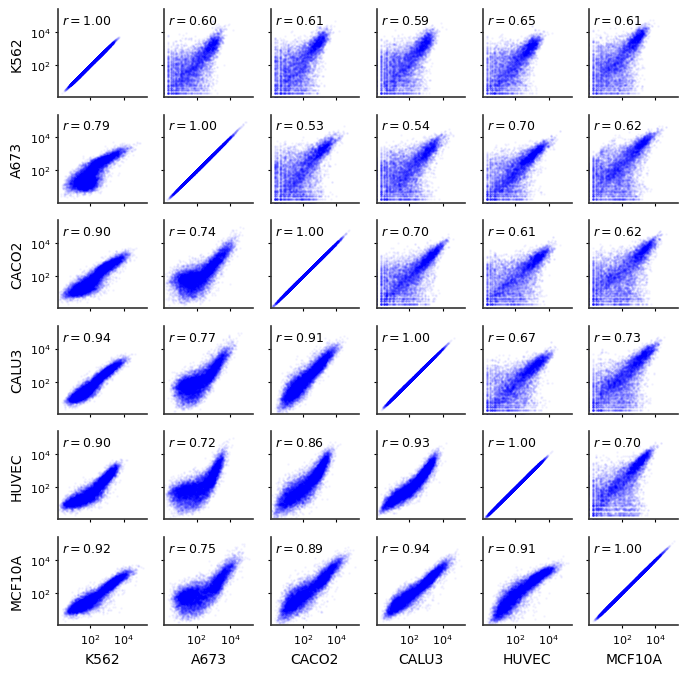

In [191]:
def plot_counts_across_cell_types(all_pred_counts, all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 8,
                   "ytick.labelsize": 8}
    plt.rcParams.update(plot_params)
    
    
    fig, axes = plt.subplots(len(cell_types), len(cell_types),
                             figsize=(8, 8), sharex=True, sharey=True)
    
    for i, (ax_row, cell_1) in enumerate(zip(axes, cell_types)):
        pred_counts1 = all_pred_counts[cell_1]
        true_counts1 = all_true_counts[cell_1].sum(axis=-1)  # not stranded
        for j, (ax, cell_2) in enumerate(zip(ax_row, cell_types)):
            pred_counts2 = all_pred_counts[cell_2]
            true_counts2 = all_true_counts[cell_2].sum(axis=-1)  # not stranded

            pred_counts1 = pred_counts1.squeeze().flatten()
            pred_counts2 = pred_counts2.squeeze().flatten()
            
            true_counts1 = true_counts1.squeeze().flatten()
            true_counts2 = true_counts2.squeeze().flatten()

            assert pred_counts1.shape == pred_counts2.shape, (pred_counts1.shape, pred_counts2.shape)
            assert true_counts1.shape == true_counts2.shape, (true_counts1.shape, true_counts2.shape)

            if i >= j:
                pearson_r = np.corrcoef(pred_counts1, pred_counts2)[0,1]

                ax.scatter(np.exp(pred_counts1),
                           np.exp(pred_counts2),
                            alpha = 0.03, s = 1, color="blue")
            else:
                pearson_r = np.corrcoef(np.log1p(true_counts1), np.log1p(true_counts2))[0,1]

                ax.scatter(true_counts1,
                           true_counts2,
                           alpha = 0.03, s = 1, color="blue")

            ax.semilogy()
            ax.semilogx()

            if cell_1 == cell_types[-1]:
                ax.set_xlabel(cell_2, fontsize=10)

            if pearson_r is not None:
                ax.text(2, 30000,
                         r'$r = %0.2f$' % pearson_r,
                         fontsize=9)

            ax.spines["left"].set_linewidth(1.2)
            ax.spines["bottom"].set_linewidth(1.2)
            ax.spines["left"].set_color("#333333")
            ax.spines["bottom"].set_color("#333333")
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)

            ax.tick_params("y", length=2)
            ax.tick_params("x", length=2)
            ax.set_xticks([10**2, 10**4])

            if cell_2 == cell_types[0]:
                ax.set_ylabel(cell_1, fontsize=10)
        
    plt.show()
    

plot_counts_across_cell_types(union_pred_logcounts, union_true_counts, cell_types)

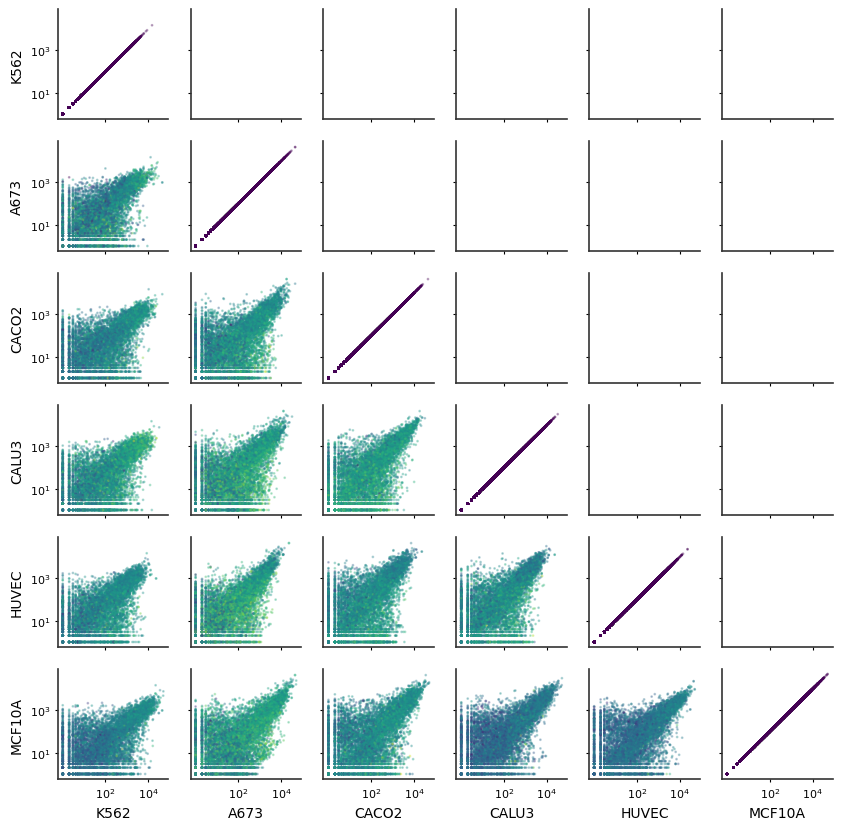

In [201]:
def plot_count_residuals_across_cell_types(all_pred_counts, all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 8,
                   "ytick.labelsize": 8}
    plt.rcParams.update(plot_params)
    
    
    fig, axes = plt.subplots(len(cell_types), len(cell_types),
                             figsize=(10, 10), sharex=True, sharey=True)
    
    for i, (ax_row, cell_1) in enumerate(zip(axes, cell_types)):
        pred_counts1 = all_pred_counts[cell_1]
        true_counts1 = all_true_counts[cell_1].sum(axis=-1)  # not stranded
        for j, (ax, cell_2) in enumerate(zip(ax_row, cell_types)):
            pred_counts2 = all_pred_counts[cell_2]
            true_counts2 = all_true_counts[cell_2].sum(axis=-1)  # not stranded

            pred_counts1 = pred_counts1.squeeze().flatten()
            pred_counts2 = pred_counts2.squeeze().flatten()
            
            true_counts1 = true_counts1.squeeze().flatten()
            true_counts2 = true_counts2.squeeze().flatten()

            assert pred_counts1.shape == pred_counts2.shape, (pred_counts1.shape, pred_counts2.shape)
            assert true_counts1.shape == true_counts2.shape, (true_counts1.shape, true_counts2.shape)

            if i >= j:
                ax.scatter(true_counts1,
                           true_counts2,
                           #c = np.abs(np.log1p(true_counts2) - pred_counts2),
                           c = pred_counts1 - pred_counts2,
                           alpha = 0.3, s = 1)#, color="blue")
            #else:
                #ax.scatter(true_counts1,
                #           true_counts2,
                #           c = np.abs(np.log1p(true_counts1) - pred_counts1),
                #           alpha = 0.3, s = 1)#, color="blue")

            ax.semilogy()
            ax.semilogx()

            if cell_1 == cell_types[-1]:
                ax.set_xlabel(cell_2, fontsize=10)

            ax.spines["left"].set_linewidth(1.2)
            ax.spines["bottom"].set_linewidth(1.2)
            ax.spines["left"].set_color("#333333")
            ax.spines["bottom"].set_color("#333333")
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)

            ax.tick_params("y", length=2)
            ax.tick_params("x", length=2)
            ax.set_xticks([10**2, 10**4])

            if cell_2 == cell_types[0]:
                ax.set_ylabel(cell_1, fontsize=10)
        
    plt.show()
    

plot_count_residuals_across_cell_types(union_pred_logcounts, union_true_counts, cell_types)

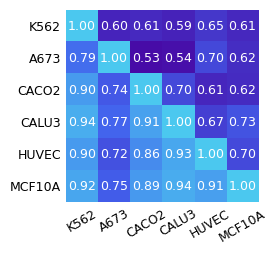

In [195]:
def plot_counts_heatmap_across_cell_types(all_pred_counts, all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 9,
                   "ytick.labelsize": 9}
    plt.rcParams.update(plot_params)
    
    #fig, axes = plt.subplots(len(cell_types), len(cell_types),
    #                         figsize=(8, 8), sharex=True, sharey=True)
    
    pearson_rs = np.full((len(cell_types), len(cell_types)), np.nan)
    
    for i, cell_1 in enumerate(cell_types):
        pred_counts1 = all_pred_counts[cell_1]
        true_counts1 = all_true_counts[cell_1].sum(axis=-1)
        for j, cell_2 in enumerate(cell_types):
            pred_counts2 = all_pred_counts[cell_2]
            true_counts2 = all_true_counts[cell_2].sum(axis=-1)

            pred_counts1 = pred_counts1.squeeze().flatten()
            pred_counts2 = pred_counts2.squeeze().flatten()
            true_counts1 = true_counts1.squeeze().flatten()
            true_counts2 = true_counts2.squeeze().flatten()
            
            assert pred_counts1.shape == pred_counts2.shape, (pred_counts1.shape, pred_counts2.shape)
            assert true_counts1.shape == true_counts2.shape, (true_counts1.shape, true_counts2.shape)
            
            if i >= j:
                pearson_rs[i,j] = np.corrcoef(pred_counts1, pred_counts2)[0,1]
            else:
                pearson_rs[i,j] = np.corrcoef(np.log1p(true_counts1), np.log1p(true_counts2))[0,1]
    
    plt.figure(figsize=(2.5,2.5))
    cmap = get_continuous_cmap(["#480CA8", "#4361EE", "#4CC9F0"])
    plt.imshow(pearson_rs, cmap=cmap)
    
    ax = plt.gca()
    
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            pearson_r = pearson_rs[i, j]
            pearson_str = "%0.2f" % (pearson_r)# if pearson_r < 0.9999 else "1"
            text = ax.text(j, i, pearson_str,
                           ha="center", va="center", color="w", fontsize=9)
    
    
    
    for side in ["top", "right", "bottom", "left"]:
        ax.spines[side].set_visible(False)
    
    ax.tick_params(length=0)

    ax.set_xticks(range(len(cell_types)), cell_types, rotation=30)
    ax.set_yticks(range(len(cell_types)), cell_types)
    
    plt.show()
    
plot_counts_heatmap_across_cell_types(union_pred_logcounts, union_true_counts, cell_types)

In [53]:
from file_configs import ModiscoFilesConfig
from motif_hits_utils import *
import gzip

def load_coords(peak_bed, in_window):
    if peak_bed.endswith(".gz"):
        with gzip.open(peak_bed) as f:
            lines = [line.decode().split() for line in f]
    else:
        with open(peak_bed) as f:
            lines = [line.split() for line in f]

    coords = []
    for line in lines:
        chrom, peak_start, peak_end = line[0], int(line[1]), int(line[2])
        mid = (peak_start + peak_end) // 2
        window_start = mid - in_window // 2
        window_end = mid + in_window // 2
        coords.append((chrom, window_start, window_end))
    return coords
    
def make_peak_table(peak_path, in_window):
    coords = load_coords(peak_path, in_window)

    peak_table = pd.DataFrame(coords, columns = ["peak_chrom", "peak_start", "peak_end"])
    peak_table["summit_offset"] = in_window // 2
    peak_table = peak_table.reset_index()
    
    return peak_table

def fix_peak_table(train_val_peak_table, val_peak_table):
    del val_peak_table["index"]
    del val_peak_table["summit_offset"]
    
    return pd.merge(val_peak_table, train_val_peak_table, how="inner",
                              on=["peak_chrom", "peak_start", "peak_end"])

def get_peak_hits(peak_table, hit_table):
    """
    For each peak, extracts the set of motif hits that fall in that peak.
    Returns a list mapping peak index to a subtable of `hit_table`. The index
    of the list is the index of the peak table.
    """
    peak_hits = [pd.DataFrame(columns=list(hit_table))] * len(peak_table)

    peak_indexes = peak_table["index"].values
    actual_indexes = list(peak_table.index)
    peak_index_to_actual_index = dict(zip(peak_indexes, actual_indexes))

    for peak_index, matches in hit_table.groupby("peak_index"):
        if peak_index in peak_index_to_actual_index:
            peak_hits[peak_index_to_actual_index[peak_index]] = matches
    return peak_hits

def get_peak_motif_counts(peak_hits, motif_keys):
    """
    From the peak hits (as returned by `get_peak_hits`), computes a count
    array of size N x M, where N is the number of peaks and M is the number of
    motifs. Each entry represents the number of times a motif appears in a peak.
    `motif_keys` is a list of motif keys as they appear in `peak_hits`; the
    order of the motifs M matches this list.
    """
    motif_inds = {motif_keys[i] : i for i in range(len(motif_keys))}
    counts = np.zeros((len(peak_hits), len(motif_keys)), dtype=int)
    for i in range(len(peak_hits)):
        hits = peak_hits[i]
        for key, num in zip(*np.unique(hits["key"], return_counts=True)):
            counts[i][motif_inds[key]] = num
            
    return counts

Timestamp: 2022-10-05_03-39-32


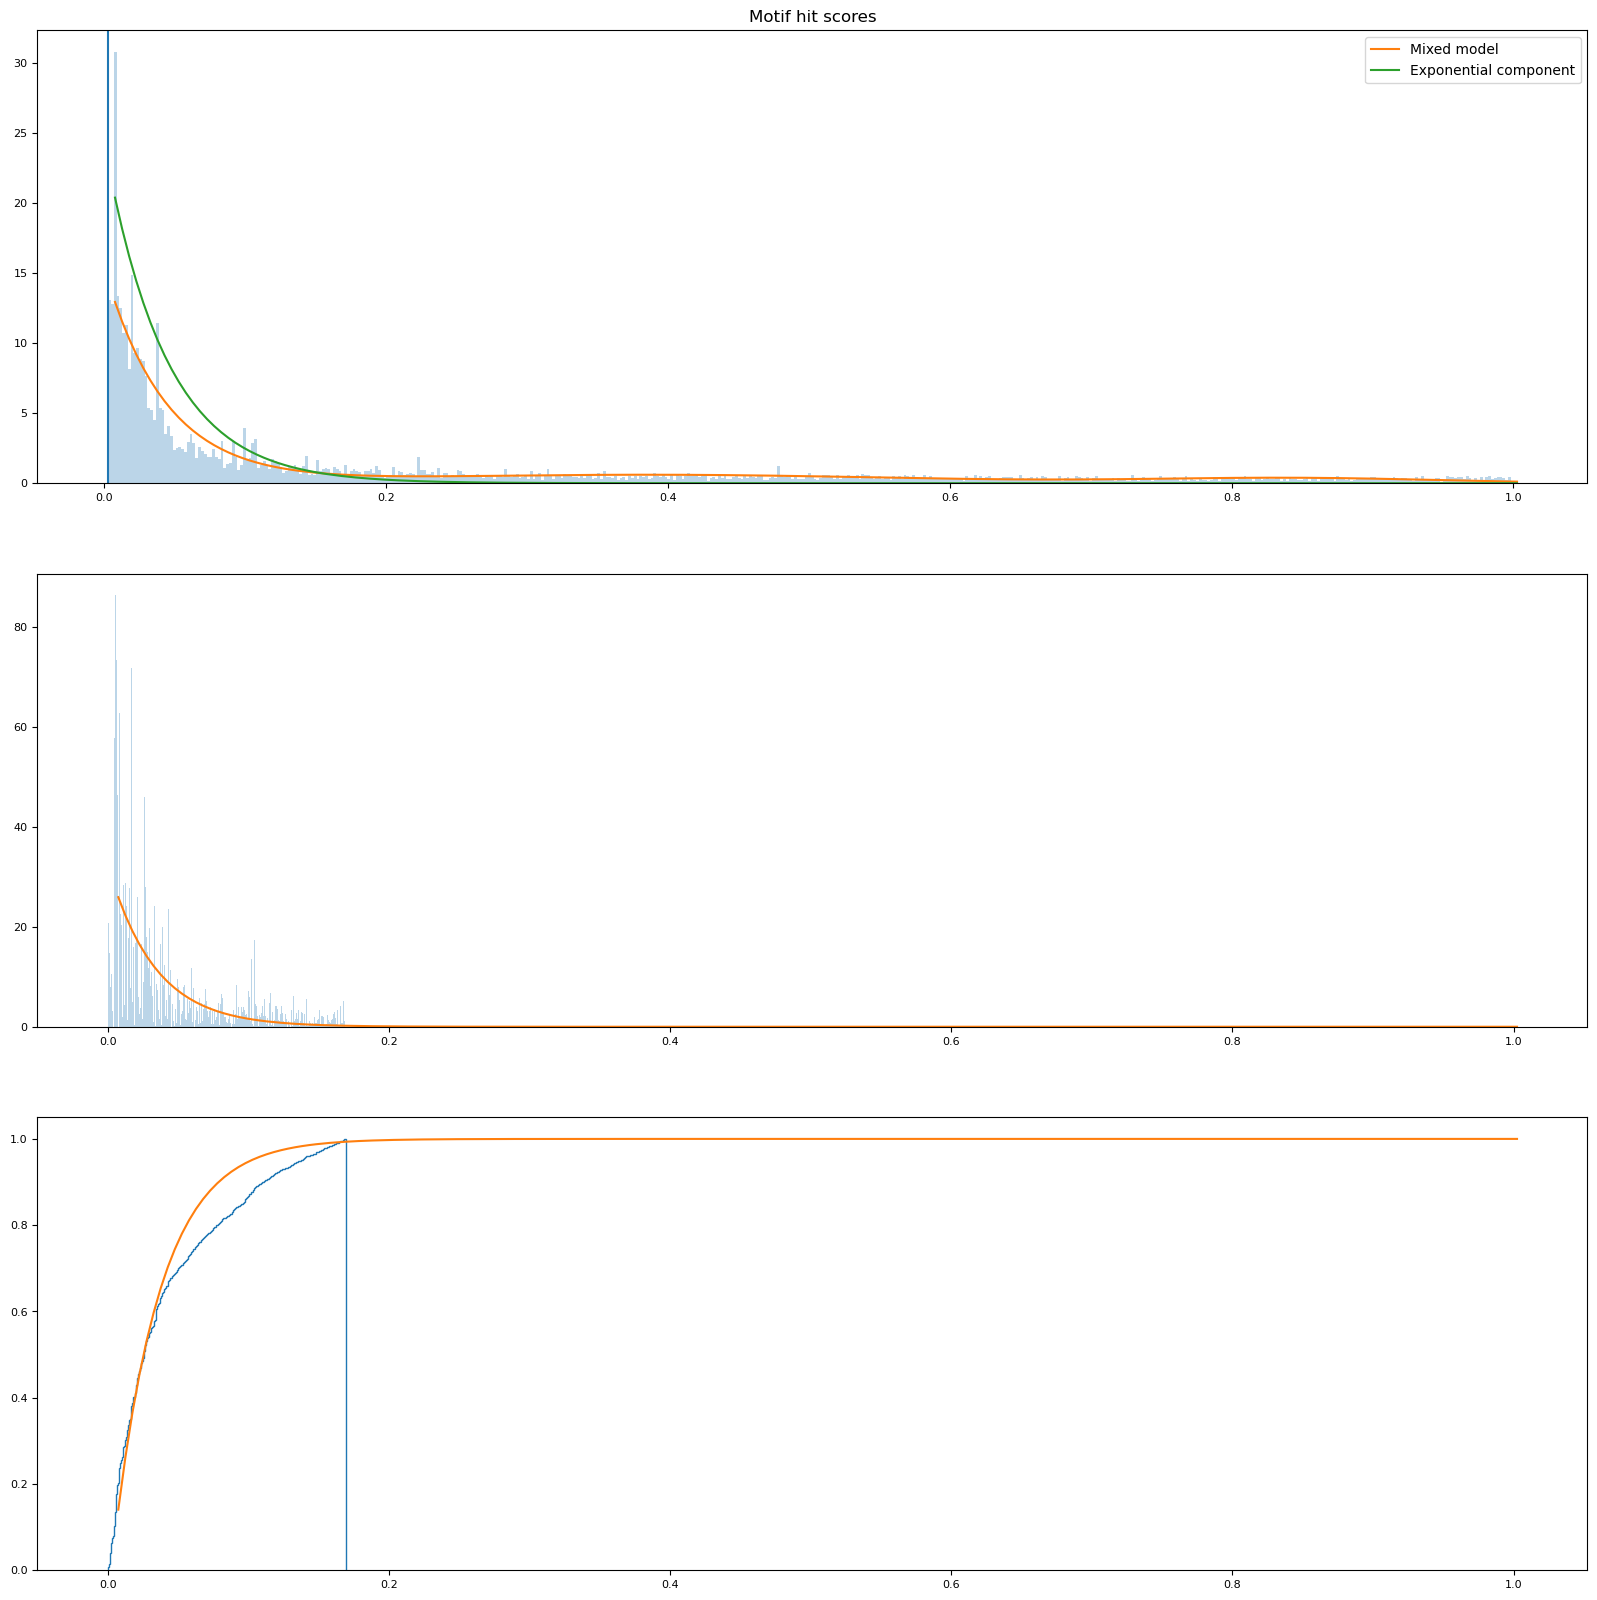

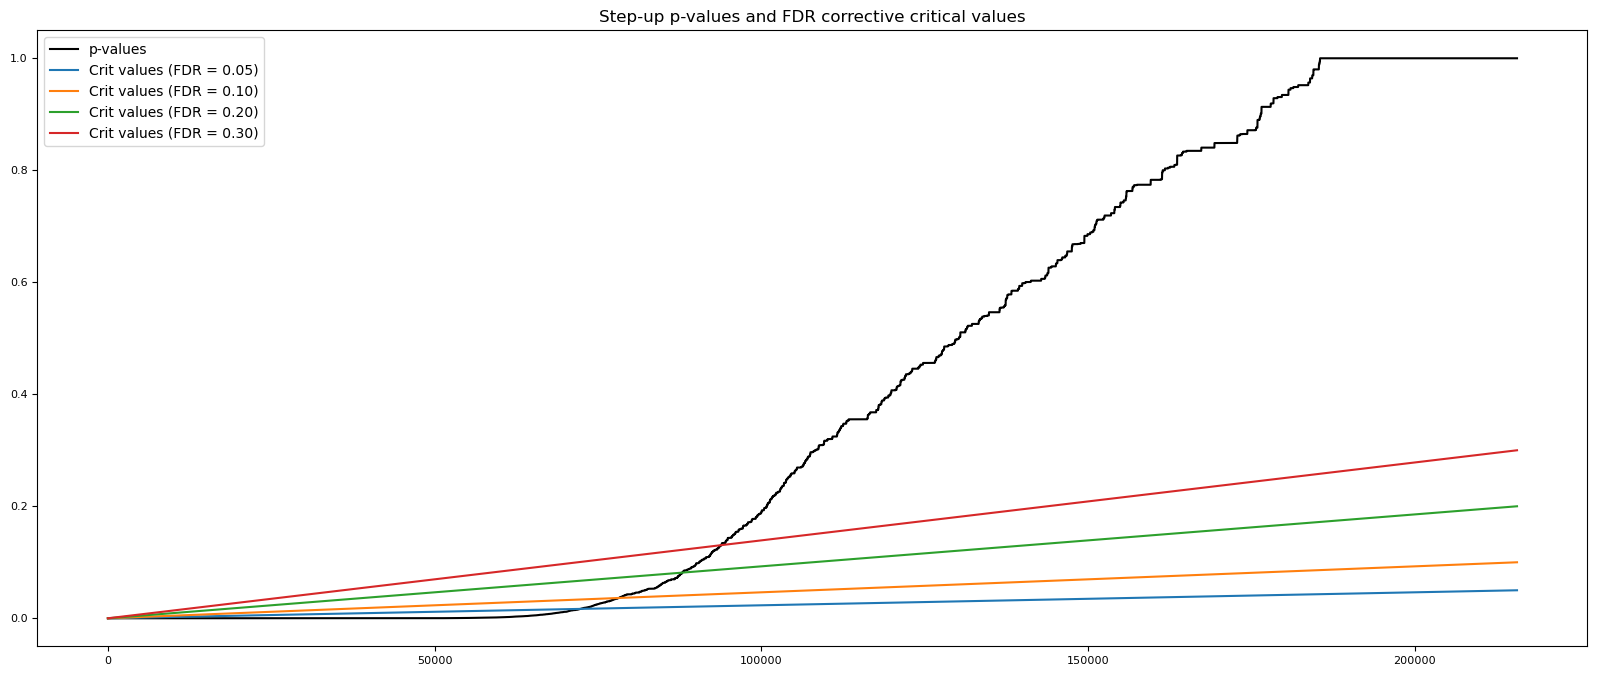

FDR level,Number of hits kept,% hits kept
0.05,72347,33.55%
0.10,78203,36.27%
0.20,87859,40.75%
0.30,93873,43.54%


Timestamp: 2022-10-05_03-39-32


In [65]:
def fix_peak_table(train_val_peak_table, val_peak_table):
    del val_peak_table["index"]
    del val_peak_table["summit_offset"]
    
    return pd.merge(val_peak_table, train_val_peak_table, how="inner",
                              on=["peak_chrom", "peak_start", "peak_end"])

def get_peak_hits(peak_table, hit_table):
    """
    For each peak, extracts the set of motif hits that fall in that peak.
    Returns a list mapping peak index to a subtable of `hit_table`. The index
    of the list is the index of the peak table.
    """
    peak_hits = [pd.DataFrame(columns=list(hit_table))] * len(peak_table)

    peak_indexes = peak_table["index"].values
    actual_indexes = list(peak_table.index)
    peak_index_to_actual_index = dict(zip(peak_indexes, actual_indexes))

    for peak_index, matches in hit_table.groupby("peak_index"):
        if peak_index in peak_index_to_actual_index:
            peak_hits[peak_index_to_actual_index[peak_index]] = matches
    return peak_hits

def get_peak_motif_counts(peak_hits, motif_keys):
    """
    From the peak hits (as returned by `get_peak_hits`), computes a count
    array of size N x M, where N is the number of peaks and M is the number of
    motifs. Each entry represents the number of times a motif appears in a peak.
    `motif_keys` is a list of motif keys as they appear in `peak_hits`; the
    order of the motifs M matches this list.
    """
    motif_inds = {motif_keys[i] : i for i in range(len(motif_keys))}
    counts = np.zeros((len(peak_hits), len(motif_keys)), dtype=int)
    for i in range(len(peak_hits)):
        hits = peak_hits[i]
        for key, num in zip(*np.unique(hits["key"], return_counts=True)):
            counts[i][motif_inds[key]] = num
            
    return counts


def load_motif_hits_all_cells(cell_types, timestamps, model_type, data_type,
                              task = "profile", fdr = 0.05):
    motif_hits = dict()
    peak_hits = dict()
    peak_hit_counts = dict()
    
    for cell_type in cell_types:
        modisco_config = ModiscoFilesConfig(cell_type, model_type,
                                    timestamps[cell_type], task,
                                    data_type)
        modisco_results_path = modisco_config.results_save_path
        modisco_hits_path = os.path.join(os.path.dirname(modisco_results_path), "motif_hits.bed")
        hits = import_motif_hits(modisco_hits_path)
        
        # Filter motif hit table by p-value using FDR estimation
        filtered_hits, _ = filter_peak_hits_by_fdr(hits,
                                score_column="fann_perclasssum_perc",
                                fdr_cutoff=fdr)
        motif_hits[cell_type] = filtered_hits
        
        # Match peaks to motif hits
        train_val_peak_table = make_peak_table(modisco_config.train_val_peak_path,
                             modisco_config.in_window)
        
        # We need to subset to just the peaks in the val set
        val_config = ValFilesConfig(cell_type, model_type,
                                    timestamps[cell_type], data_type)
        val_peak_table = make_peak_table(val_config.val_peak_path,
                                         modisco_config.in_window)
        peak_table = fix_peak_table(train_val_peak_table, val_peak_table)
        
        peak_hits[cell_type] = get_peak_hits(peak_table, filtered_hits)

        # Count hits of each motif in each peak
        peak_hit_counts[cell_type] = get_peak_motif_counts(peak_hits[cell_type],
                                                list(set(hits["key"])))
        
    return motif_hits, peak_hits, peak_hit_counts

motif_hits_dfs, peak_hits, peak_hit_counts = load_motif_hits_all_cells(["K562"],
                                                                       timestamps,
                                                                       model_type,
                                                                       data_type)

In [58]:
# This is specific to K562

motif_keys_to_labels = ["BRE/SP", "Inr", "GABPA/ELK4", "NFY", "NRF1", "ATF1",
                        "YY1", "TA-Inr", "TATA", "THAP11",
                        "AP1",  "CTCF", "ZBTB33"]

In [56]:
peak_hit_counts["K562"].shape

(3834, 13)

In [57]:
len(motif_keys_to_labels)

15

In [66]:
def get_filter_for_peaks_with_motif(peak_hit_counts, motif_key_labels, motifs_to_find):
    motif_bools = dict()
    for motif in motifs_to_find:
        assert motif in motif_key_labels, (motif, motif_key_labels)
        motif_index = motif_key_labels.index(motif)
        motif_bools[motif] = peak_hit_counts[:, motif_index] > 0

    return motif_bools

motif_filters = get_filter_for_peaks_with_motif(peak_hit_counts["K562"],
                                                motif_keys_to_labels,
                                                ["TATA", "Inr", "TA-Inr"])

In [68]:
def load_coords_all_cells(cell_types, timestamps, model_type, data_type):
    coords = dict()
    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        coords[cell_type] = load_coords(config.val_peak_path,
                                        config.in_window)
    return coords

coords = load_coords_all_cells(cell_types, timestamps, model_type, data_type)

Timestamp: 2022-10-05_03-39-32
Timestamp: 2022-11-01_05-16-07
Timestamp: 2022-11-01_19-09-32
Timestamp: 2022-11-01_19-09-51
Timestamp: 2022-11-01_05-16-51
Timestamp: 2022-11-01_05-04-08


In [69]:
from collections import defaultdict

def get_ccre_bed(cell_type):
    proj_dir = get_proj_dir()
    return proj_dir + "/annotations/" + cell_type + "/cCREs.bed.gz"


def load_annotations(annot_bed):
    if annot_bed.endswith(".gz"):
        with gzip.open(annot_bed) as f:
            lines = [line.decode().split() for line in f]
    else:
        with open(annot_bed) as f:
            lines = [line.split() for line in f]

    coords = []
    for line in lines:
        chrom, start, end, annot = line[0], int(line[1]), int(line[2]), line[9]
        coords.append((chrom, start, end, annot))
    return coords

def get_overlap_annots(list_a, list_b):
    # This function is similar to bedtools intersect,
    # but returns the bed file's labels, if windows overlap, for each
    # window in list_a.
    
    # Assumes everything's on the same chromosome
    # Assumes list_a is list of (start, stop), list_b is (start, stop, label)
    
    # output is list with len == len(list_a)
    matches = []
    
    for a_item in list_a:
        a_labels = []
        a_start, a_end = a_item
        b_index = 0
        while b_index < len(list_b):
            b_start, b_end, label = list_b[b_index]
            
            # b is after a
            if b_start >= a_end:
                break
            # b is before a
            if b_end <= a_start:
                b_index += 1
                continue
            # only other case left: b overlaps a
            a_labels.append(label)
            b_index += 1

        matches.append(a_labels)
    assert len(matches) == len(list_a), matches
    return matches

def format_annot_list(annot_list):
    # if input is ["A", "B,C", "D"], returns ["A", "B", "C", "D"]
    fixed_list = []
    for item in annot_list:
        fixed_list.extend(item.split(","))
    return fixed_list

def get_annotations_for_peaks(coords, annotation_file, in_window, out_window):
    annots = load_annotations(annotation_file)

    # get set of chromosomes included in peak set
    chroms = sorted(list(set(coord[0] for coord in coords)))

    # make dict of chromosome --> sorted list of annotated regions + labels
    annots_by_chrom = {chrom : sorted([a[1:] for a in annots if a[0] == chrom]) for chrom in chroms}
    
    # adjust the starts and ends of peak coordinates so they only cover +/- 500 bp
    # (otherwise we'd probably get a lot of FP annotation overlaps)
    adjust_by = (in_window - out_window) // 2
    coords_adjust = [(c[0], c[1] + adjust_by, c[2] - adjust_by) for c in coords]
    
    # get list of annotations overlapping peak, for each peak (takes a few min)
    overlap_annots_raw = [get_overlap_annots((coord[1:],), annots_by_chrom[coord[0]])[0] for coord in coords_adjust]
    
    # process raw string annotations into list of unique hits
    overlap_annots = [sorted(list(set(format_annot_list(annot_list)))) for annot_list in overlap_annots_raw]
    
    # get set of unique annotation labels
    all_annot_labels = set([annot for annot_list in overlap_annots for annot in annot_list])
    
    # make dict of annotation label --> list of len(num_peaks), where each element is True if overlap
    overlap_annots_bools = {annot_label : np.array([annot_label in annot_list for annot_list in overlap_annots]) for annot_label in all_annot_labels}
    return overlap_annots_bools

def load_ccre_annots_all_cells(cell_types, all_coords, in_window=2114, out_window=1000):
    ccre_annots = dict()
    for cell_type in cell_types:
        coords = all_coords[cell_type]
        ccre_bed = get_ccre_bed(cell_type)
        ccre_annots[cell_type] = get_annotations_for_peaks(coords, ccre_bed,
                                                           in_window, out_window) 

    return ccre_annots

ccre_annots = load_ccre_annots_all_cells(["K562"], coords)

In [ ]:
def jitter_dots(dots, jitter_by=0.25):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    # only jitter in the x-direction
    jittered_offsets[:, 0] += np.random.uniform(-jitter_by,
                                                jitter_by,
                                                offsets.shape[0])
    dots.set_offsets(jittered_offsets)

In [71]:
housekeeping_genes_bed = get_proj_dir() + "/annotations/housekeeping_only.bed.gz"

In [72]:
def load_housekeeping_annotations(annot_bed):
    if annot_bed.endswith(".gz"):
        with gzip.open(annot_bed) as f:
            lines = [line.decode().split() for line in f]
    else:
        with open(annot_bed) as f:
            lines = [line.split() for line in f]

    coords = []
    for line in lines:
        chrom, start, end = line[0], int(line[1]), int(line[2])
        coords.append((chrom, start, end))
    return coords

def get_overlap_hks(list_a, list_b):
    # This function is similar to bedtools intersect,
    # but returns True/False based on if any windows overlap, for each
    # window in list_a.
    
    # Assumes everything's on the same chromosome
    # Assumes list_a + list_b are lists of format (start, stop)
    
    # output is list with len == len(list_a)
    matches = []
    
    for a_item in list_a:
        a_start, a_end = a_item
        b_index = 0
        a_found_in_b = False
        while b_index < len(list_b):
            b_start, b_end = list_b[b_index]
            
            # b is after a
            if b_start >= a_end:
                break
            # b is before a
            if b_end <= a_start:
                b_index += 1
                continue
            # only other case left: b overlaps a
            a_found_in_b = True
            break

        matches.append(a_found_in_b)
    assert len(matches) == len(list_a), matches
    return matches

def get_annotations_for_hk_genes(coords, annotation_file, in_window=2114, out_window=1000):
    annots = load_housekeeping_annotations(annotation_file)

    # get set of chromosomes included in peak set
    chroms = sorted(list(set(coord[0] for coord in coords)))

    # make dict of chromosome --> sorted list of annotation regions
    annots_by_chrom = {chrom : sorted([a[1:] for a in annots if a[0] == chrom]) for chrom in chroms}
    
    # adjust the starts and ends of peak coordinates so they only cover +/- 500 bp
    # (otherwise we'd probably get a lot of FP annotation overlaps)
    adjust_by = (in_window - out_window) // 2
    coords_adjust = [(c[0], c[1] + adjust_by, c[2] - adjust_by) for c in coords]
    
    # get bool for peak overlap, for each peak
    overlap_annots = np.array([get_overlap_hks((coord[1:],), annots_by_chrom[coord[0]])[0] for coord in coords_adjust])
    return overlap_annots


hk_annots = get_annotations_for_hk_genes(coords["K562"], housekeeping_genes_bed)

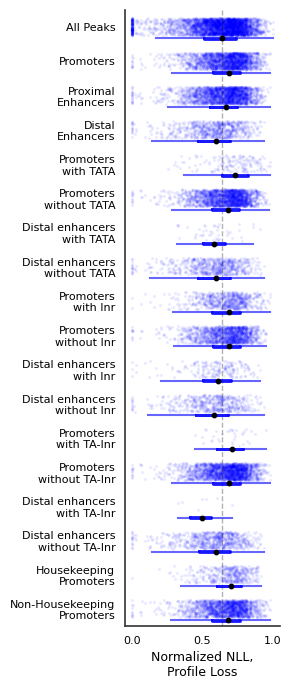

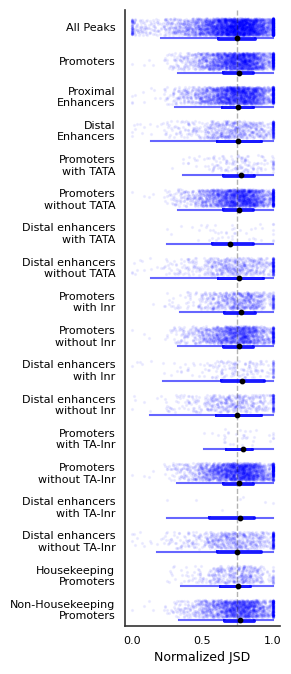

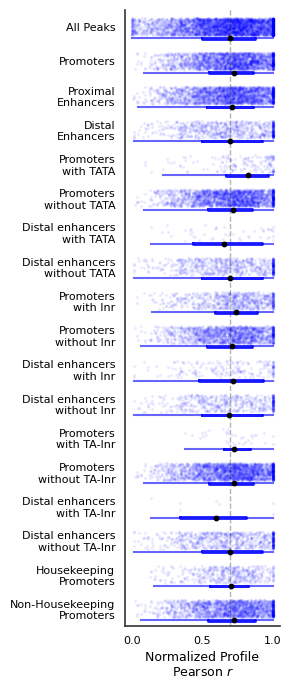

In [131]:
def jitter_dots_y(dots, jitter_by=0.25):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    jittered_offsets[:, 1] += np.random.uniform(-jitter_by,
                                                jitter_by,
                                                offsets.shape[0])
    dots.set_offsets(jittered_offsets)

def plot_scatter_and_boxplot(data, position, color = "blue", dot_size=2, dot_alpha=0.05,
                             box_linewidth=2, box_whisker_linewidth=1.5):
    
    dots = plt.scatter(data, [position] * len(data),
                       color = color, s = dot_size, alpha=dot_alpha)
    jitter_dots_y(dots)

    plt.boxplot([data], positions=[position + 0.34],
                sym="", widths=0.02, showcaps=False, vert=False,
                boxprops={"linewidth":box_linewidth, "alpha":0.9, "color":color},
                whiskerprops={"linewidth":box_whisker_linewidth, "alpha":0.6, "color":color})
    # draw median dot
    plt.scatter(np.median(data), [position + 0.34], s=10, color="k", zorder=30)
    
    
def plot_stratify(val_metrics, ccre_annots, hk_annots, motif_filters, motif_keys_labels, metric = "nll"):
    metric_names = {"nll" : "Normalized NLL,\nProfile Loss",
                    "jsd" : "Normalized JSD",
                    "profile_pearson" : "Normalized Profile\n" + r'Pearson $r$'}
    
    annots_to_labels = {"PLS" : "Promoters",
                        "pELS" : "Proximal\nEnhancers",
                        "dELS" : "Distal\nEnhancers"}

    annots_to_labels_hk =  {"hk" : "Housekeeping\nPromoters",
                             "not-hk" : "Non-Housekeeping\nPromoters"}


    metrics = val_metrics[metric].squeeze()
    
    x_labels = []
    
    plt.figure(figsize=(2, 8))

    plt.axvline(np.median(metrics), linestyle="dashed", alpha=0.3, color="k", linewidth=1)
    
    x_index = 0
    x_labels.append("All Peaks")
    plot_scatter_and_boxplot(metrics, x_index)
    x_index += 1
    
    for annot_name in annots_to_labels.keys():
        x_labels.append(annots_to_labels[annot_name])
        metrics_subset = metrics[ccre_annots[annot_name]]
        plot_scatter_and_boxplot(metrics_subset, x_index)
        x_index += 1
    
    for motif in motif_filters.keys():
        x_labels.append("Promoters\nwith " + motif)
        metrics_subset = metrics[ccre_annots["PLS"] * motif_filters[motif]]
        plot_scatter_and_boxplot(metrics_subset, x_index)
        x_index += 1
        
        x_labels.append("Promoters\nwithout " + motif)
        metrics_subset = metrics[ccre_annots["PLS"] * (~ motif_filters[motif])]
        plot_scatter_and_boxplot(metrics_subset, x_index)
        x_index += 1
        
        
        x_labels.append("Distal enhancers\nwith " + motif)
        metrics_subset = metrics[ccre_annots["dELS"] * motif_filters[motif]]
        plot_scatter_and_boxplot(metrics_subset, x_index)
        x_index += 1
        
        x_labels.append("Distal enhancers\nwithout " + motif)
        metrics_subset = metrics[ccre_annots["dELS"] * (~ motif_filters[motif])]
        plot_scatter_and_boxplot(metrics_subset, x_index)
        x_index += 1

    
    for annot_name in annots_to_labels_hk.keys():
        x_labels.append(annots_to_labels_hk[annot_name])
        
        if annot_name == "hk":
            metrics_subset = metrics[ccre_annots["PLS"] * hk_annots]
        else:
            metrics_subset = metrics[ccre_annots["PLS"] * (~ hk_annots)]

        plot_scatter_and_boxplot(metrics_subset, x_index)
        x_index += 1
        
    ax = plt.gca()
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    plt.xticks(fontsize=8)
    plt.xlabel(metric_names[metric], fontsize=9)

    plt.yticks(range(len(x_labels)),
               x_labels,
               fontsize = 8)
    plt.ylim(len(x_labels) - 0.5, -0.5)
    
    plt.show()
    
plot_stratify(norm_val_metrics["K562"], ccre_annots["K562"], hk_annots, motif_filters, motif_keys_to_labels)
plot_stratify(norm_val_metrics["K562"], ccre_annots["K562"], hk_annots, motif_filters, motif_keys_to_labels, metric="jsd")
plot_stratify(norm_val_metrics["K562"], ccre_annots["K562"], hk_annots, motif_filters, motif_keys_to_labels, metric="profile_pearson")